# Gender fits

## Load libraries and read file

In [1]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import seaborn as sns
import random
import sklearn
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#df_test = pd.read_spss('data/newdata/مهندسی.sav')
df_test = pd.read_excel('data/data_w_origin/GHOMOYAT.xlsx')
print(df_test.shape)

(15363, 19)


In [2]:
import re
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

df_test['Sen']=df_test['Sen'].apply(lambda cw : remove_tags(cw))
#df_test.head()

def age_calc(string):
    year, month, day = string.split("/")
    year = 1401 - int(year)
    return year

df_test['Sen']=df_test['Sen'].apply(lambda cw : age_calc(cw))
df_test.head()

,Danshkadeh,Sen,Maghtah,Type,Moadel,Meliyat,Vaziyat Tahol,Farzandan,Sal,Komak Mali,Jensiyat,Eteghal,Enseraf,Hazf,Morakhasi,Tagher Reshteh,Mehman,Mantagheh,GDP
0,1,21,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,3,5
1,1,21,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,5,2
2,1,21,0,0,12.61,1,1,0,6,1,0,0,0,0,0,0,0,1,1
3,1,22,0,0,13.93,1,1,0,6,1,1,0,0,0,0,0,0,1,1
4,1,20,0,0,999.00,1,1,0,6,1,1,0,0,0,0,0,0,1,1


In [3]:
cols = ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat',
       'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat',
       'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman',
       'Mantagheh', 'GDP']
df_test.columns = cols
df_test.drop(['Mantagheh', 'GDP'], axis=1, inplace=True)
df_test.columns
df_test = df_test.loc[~(df_test == 999).any(axis=1)]

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13709 entries, 0 to 15362
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Danshkadeh      13709 non-null  int64  
 1   Sen             13709 non-null  int64  
 2   Maghtah         13709 non-null  int64  
 3   Type            13709 non-null  int64  
 4   Moadel          13709 non-null  float64
 5   Meliyat         13709 non-null  int64  
 6   Vaziyat Tahol   13709 non-null  int64  
 7   Farzandan       13709 non-null  int64  
 8   Sal             13709 non-null  int64  
 9   Komak Mali      13709 non-null  int64  
 10  Jensiyat        13709 non-null  int64  
 11  Eteghal         13709 non-null  int64  
 12  Enseraf         13709 non-null  int64  
 13  Hazf            13709 non-null  int64  
 14  Morakhasi       13709 non-null  int64  
 15  Tagher Reshteh  13709 non-null  int64  
 16  Mehman          13709 non-null  int64  
dtypes: float64(1), int64(16)
memory

## EDA

In [5]:
'''
# create a dictionary to map unique values to numbers
mapping_dict = {}
variables = list(set(df_test.columns) - {"ID", "Sen", "Moadel", "Farzandan", "Sal"})
for col in variables:
    unique_values = df_test[col].unique()
    mapping_dict[col] = {value: i for i, value in enumerate(unique_values)}

# replace values in data frame with mapped values
df_test.replace(mapping_dict, inplace=True)
df_test.head()
'''

'\n# create a dictionary to map unique values to numbers\nmapping_dict = {}\nvariables = list(set(df_test.columns) - {"ID", "Sen", "Moadel", "Farzandan", "Sal"})\nfor col in variables:\n    unique_values = df_test[col].unique()\n    mapping_dict[col] = {value: i for i, value in enumerate(unique_values)}\n\n# replace values in data frame with mapped values\ndf_test.replace(mapping_dict, inplace=True)\ndf_test.head()\n'

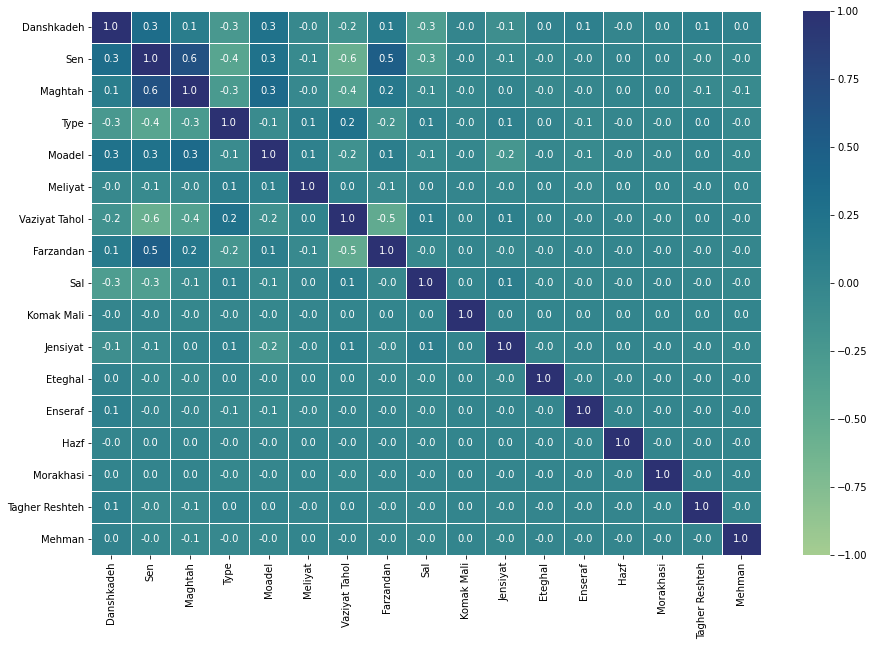

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df_test.corr(), annot=True, linewidth=.5, vmin = -1, vmax = 1, cmap="crest", fmt=".1f");

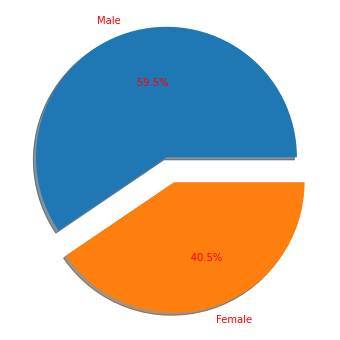

In [7]:
plt.figure(figsize=(8,6))
counts_male = df_test[df_test['Jensiyat']==1].shape[0]
counts_female = df_test[df_test['Jensiyat']==0].shape[0]
plt.pie([counts_male, counts_female], explode=[0.1,0.1], shadow=True, labels=['Male ','Female'], textprops={'color':"r"}, autopct='%10.1f%%');

In [8]:
df_test.dropna(inplace=True)
df_test.isna().sum()

Danshkadeh        0
Sen               0
Maghtah           0
Type              0
Moadel            0
Meliyat           0
Vaziyat Tahol     0
Farzandan         0
Sal               0
Komak Mali        0
Jensiyat          0
Eteghal           0
Enseraf           0
Hazf              0
Morakhasi         0
Tagher Reshteh    0
Mehman            0
dtype: int64

## Gender 

<Axes: >

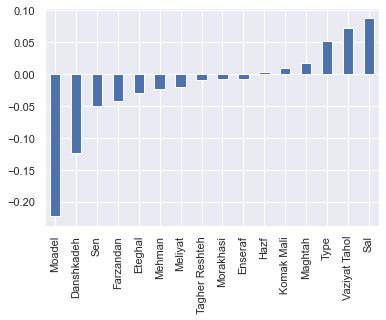

In [9]:
sns.set()
df_test.corr()['Jensiyat'].sort_values()[:-1].plot(kind='bar', grid=1)

## Logistic Regression

In [10]:
X = df_test.drop(['Jensiyat'], axis=1) 
y = df_test['Jensiyat']

print("Columns for training:", list(X.columns.values)) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
preds = logmodel.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = logmodel.get_params()
#print(params)

#Print model parameters
#print('Intercept: \n', logmodel.intercept_)
#print('Coefficients: \n', logmodel.coef_)

#Create a confusion matrix
print('Confusion matrix:\n', confusion_matrix(y_test, preds))

#Accuracy statistics
print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

print("Score in test set:", logmodel.score(X_test, y_test))
print("Score in train set:", logmodel.score(X_train, y_train))

Columns for training: ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat', 'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman']
Confusion matrix:
 [[ 421  696]
 [ 237 1388]]
Accuracy Score: 0.6597374179431073
              precision    recall  f1-score   support

           0       0.64      0.38      0.47      1117
           1       0.67      0.85      0.75      1625

    accuracy                           0.66      2742
   macro avg       0.65      0.62      0.61      2742
weighted avg       0.66      0.66      0.64      2742

Score in test set: 0.6597374179431073
Score in train set: 0.6462113613567977


In [16]:
coeff_df = pd.DataFrame(logmodel.coef_.reshape(-1),index=X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Danshkadeh,-0.063880
Sen,0.038770
Maghtah,0.285054
Type,0.083302
Moadel,-0.531610
Meliyat,-0.002724
Vaziyat Tahol,0.152268
Farzandan,-0.011270
Sal,0.161971
Komak Mali,0.011323


Variable: Maghtah              Importance: 0.285
Variable: Sal                  Importance: 0.162
Variable: Vaziyat Tahol        Importance: 0.152
Variable: Type                 Importance: 0.083
Variable: Sen                  Importance: 0.039
Variable: Tagher Reshteh       Importance: 0.017
Variable: Komak Mali           Importance: 0.011
Variable: Meliyat              Importance: -0.003
Variable: Hazf                 Importance: -0.01
Variable: Farzandan            Importance: -0.011
Variable: Morakhasi            Importance: -0.012
Variable: Enseraf              Importance: -0.028
Variable: Mehman               Importance: -0.036
Variable: Danshkadeh           Importance: -0.064
Variable: Eteghal              Importance: -0.081
Variable: Moadel               Importance: -0.532


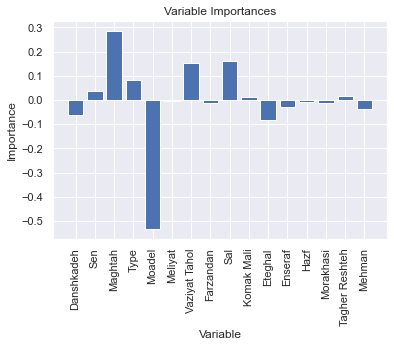

In [17]:
# Get numerical feature importances
feature_list = X.columns

importances = list(logmodel.coef_.reshape(-1))

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
plt.grid(True)

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

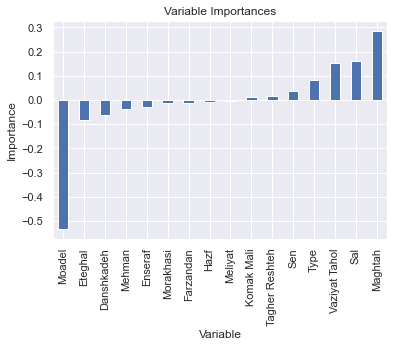

In [18]:
coeff_df['Coefficient'].sort_values()[:].plot(kind='bar', grid=1)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

## NN 

In [22]:
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD
from keras.layers import Input, Activation, Dense, Convolution2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from tensorflow import keras
from keras.callbacks import EarlyStopping

In [19]:
model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
history = model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/300
343/343 [==============================] - 2s 3ms/step - loss: 0.6669 - accuracy: 0.5972 - val_loss: 0.6325 - val_accuracy: 0.6397
Epoch 2/300
343/343 [==============================] - 1s 2ms/step - loss: 0.6410 - accuracy: 0.6418 - val_loss: 0.6214 - val_accuracy: 0.6583
Epoch 3/300
343/343 [==============================] - 1s 1ms/step - loss: 0.6332 - accuracy: 0.6582 - val_loss: 0.6113 - val_accuracy: 0.6802
Epoch 4/300
343/343 [==============================] - 0s 1ms/step - loss: 0.6282 - accuracy: 0.6604 - val_loss: 0.6097 - val_accuracy: 0.6780
Epoch 5/300
343/343 [==============================] - 0s 1ms/step - loss: 0.6252 - accuracy: 0.6630 - val_loss: 0.6032 - val_accuracy: 0.6937
Epoch 6/300
343/343 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.6675 - val_loss: 0.6046 - val_accuracy: 0.6823
Epoch 7/300
343/343 [==============================] - 0s 1ms/step - loss: 0.6212 - accuracy: 0.6663 - val_loss: 0.5994 - val_accuracy: 0.6955

343/343 [==============================] - 0s 775us/step


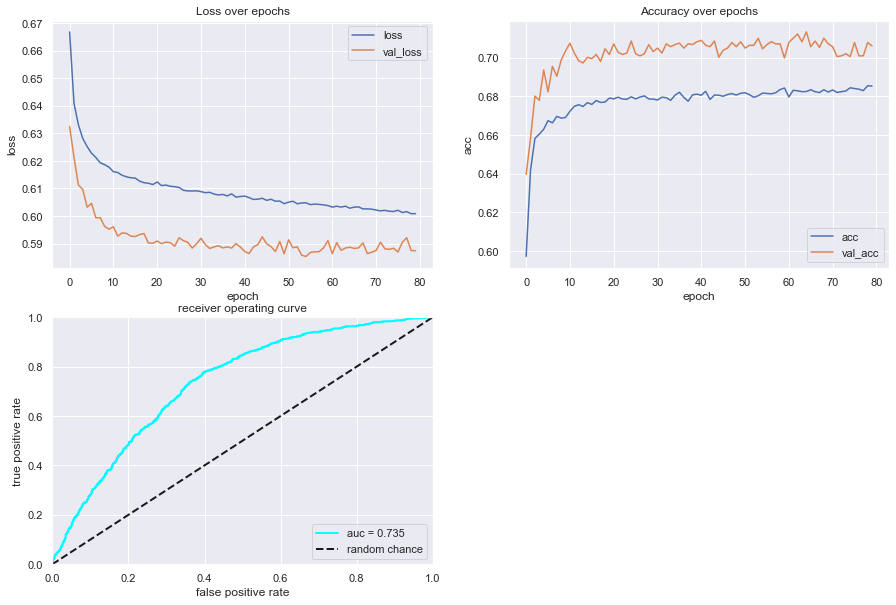

86/86 [==============================] - 0s 900us/step


In [20]:
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix

def loss_accuracy_plotter(history):
    # plot loss vs epoch
    plt.figure(figsize=(15,10))
    ax = plt.subplot(2, 2, 1)
    ax.plot(history.history['loss'], label='loss')
    ax.plot(history.history['val_loss'], label='val_loss')
    ax.legend(loc="upper right")
    ax.set_title('Loss over epochs')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')

    # plot accuracy vs epoch
    ax = plt.subplot(2, 2, 2)
    ax.plot(history.history['accuracy'], label='acc')
    ax.plot(history.history['val_accuracy'], label='val_acc')
    ax.legend(loc="lower right")
    ax.set_title('Accuracy over epochs')
    ax.set_xlabel('epoch')
    ax.set_ylabel('acc')

    # Plot ROC
    Y_predict = model.predict(X_test)
    Y_predict_train = model.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_test, Y_predict)
    roc_auc = auc(fpr, tpr)
    ax = plt.subplot(2, 2, 3)
    ax.plot(fpr, tpr, lw=2, color='cyan', label='auc = %.3f' % (roc_auc))
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
    ax.set_xlim([0, 1.0])
    ax.set_ylim([0, 1.0])
    ax.set_xlabel('false positive rate')
    ax.set_ylabel('true positive rate')
    ax.set_title('receiver operating curve')
    ax.legend(loc="lower right")
    plt.show()

loss_accuracy_plotter(history)
Y_predict = model.predict(X_test)
fpr_NN, tpr_NN, thresholds_NN = roc_curve(y_test, Y_predict)

In [21]:
predictions = model.predict(X_test).round()
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

86/86 [==============================] - 0s 819us/step
              precision    recall  f1-score   support

           0       0.70      0.49      0.58      1117
           1       0.71      0.85      0.77      1625

    accuracy                           0.71      2742
   macro avg       0.70      0.67      0.68      2742
weighted avg       0.70      0.71      0.69      2742

[[ 552  565]
 [ 241 1384]]


## NN Hyperparameter optimization

In [25]:
X_train.shape[1]

16

In [27]:
NDIM = X_train.shape[1]

def main():
    keras_pipeline = Pipeline([("scaler", StandardScaler()),
                               ("clf", keras.wrappers.scikit_learn.KerasClassifier(
                                   build_fn=make_model))
    ])
    
    param_grid = {'clf__network_layers': [(32, 32), (64, 64), (128, 128, 128)],
     'clf__batch_size': [64, 128, 256, 512],
     'clf__epochs': [50, 100, 200, 300],
     'clf__dropout_rate': [0.1, 0.01],
     'clf__optimizer': ['Nadam', 'Adam'],
     'clf__activation': ['selu', 'relu', 'tanh'],
     'clf__k_initializer': ['lecun_normal', 'normal'],
     'clf__verbose': [0]
    }
    
    rs_keras = RandomizedSearchCV(keras_pipeline,
                                  param_distributions=param_grid,
                                  cv=5, refit=True,
                                  verbose=0,
                                  n_iter=5,
                                  scoring="accuracy")
    
    history = rs_keras.fit(np.array(X_train),
                 np.array(y_train))
    
    print('Best score obtained: {0}'.format(rs_keras.best_score_))
    print('Parameters:')
    for param, value in rs_keras.best_params_.items():
        print('\t{}: {}'.format(param, value))
    return  rs_keras  

def make_model(network_layers=[(32, 32)],
               dropout_rate=0,
               optimizer="Nadam",
               activation="selu",
               k_initializer='lecun_normal',
               n_input=NDIM,
               n_class=1):
    
    model = keras.models.Sequential()

    for index, layers in enumerate(network_layers):
        if not index:
            model.add(keras.layers.Dense(layers,
                                         input_dim=n_input,
                                         activation=activation,
                                         kernel_initializer=k_initializer))
        else:
            model.add(keras.layers.Dense(layers,
                                         kernel_initializer=k_initializer,
                                         activation=activation))
        if dropout_rate and index:
            model.add(keras.layers.AlphaDropout(dropout_rate))

    model.add(keras.layers.Dense(n_class,
                                 activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    #print(model.summary())
    return model

if __name__ == '__main__':
    opt_model = main()

<ipython-input-27-569e355031fb>:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ("clf", keras.wrappers.scikit_learn.KerasClassifier(


69/69 [==============================] - 0s 1ms/step
Best score obtained: 0.6726541855851116
Parameters:
	clf__verbose: 0
	clf__optimizer: Adam
	clf__network_layers: (128, 128, 128)
	clf__k_initializer: lecun_normal
	clf__epochs: 100
	clf__dropout_rate: 0.1
	clf__batch_size: 128
	clf__activation: relu


In [ ]:
'''
Best score obtained: 0.6726541855851116
Parameters:
	clf__verbose: 0
	clf__optimizer: Adam
	clf__network_layers: (128, 128, 128)
	clf__k_initializer: lecun_normal
	clf__epochs: 100
	clf__dropout_rate: 0.1
	clf__batch_size: 128
	clf__activation: relu
'''

In [28]:
# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

drop_model = models.Sequential()
drop_model.add(layers.Dense(128,  kernel_initializer='lecun_normal', activation='relu', input_shape=(NDIM,)))
drop_model.add(layers.Dropout(0.1))
drop_model.add(layers.Dense(128,  kernel_initializer='lecun_normal', activation='relu'))
drop_model.add(layers.Dropout(0.1))
drop_model.add(layers.Dense(128,  kernel_initializer='lecun_normal', activation='relu'))
drop_model.add(layers.Dropout(0.1))
drop_model.add(layers.Dense(1, kernel_initializer='lecun_normal', activation='sigmoid'))

# compile the model
drop_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
# print the model summary
drop_model.summary()

# early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, mode='min')

# Train classifier
import time
start = time.time() # time at start of whole processing

drop_history = drop_model.fit(X_train, 
                    y_train, 
                    epochs=300, 
                    batch_size=128, 
                    verbose=1, # switch to 1 for more verbosity 
                    callbacks=[early_stopping], 
                    validation_data=(X_test,y_test)
                    )

elapsed = time.time() - start # time after whole processing
print("Time taken: "+str(round(elapsed,1))+"s") # print total time taken to process every file

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 128)               2176      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_98 (Dense)            (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_99 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_100 (Dense)           (None, 1)               

In [30]:
predictions_opt = drop_model.predict(X_test).round()
print(classification_report(y_test,predictions_opt))
print(confusion_matrix(y_test,predictions_opt))

86/86 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.69      0.49      0.57      1117
           1       0.71      0.85      0.77      1625

    accuracy                           0.70      2742
   macro avg       0.70      0.67      0.67      2742
weighted avg       0.70      0.70      0.69      2742

[[ 546  571]
 [ 248 1377]]


343/343 [==============================] - 1s 2ms/step


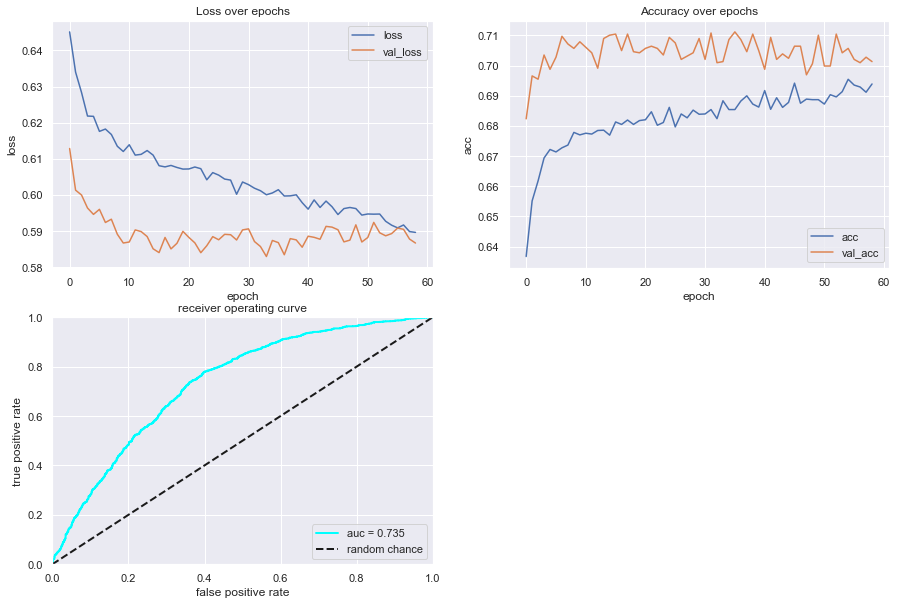

86/86 [==============================] - 0s 886us/step


In [29]:
loss_accuracy_plotter(drop_history)
Y_predict_opt = drop_model.predict(X_test)
fpr_NN_opt, tpr_NN_opt, thresholds_NN_opt = roc_curve(y_test, Y_predict_opt)

## BDT and RF

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, predictions)

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rfc_pred)

              precision    recall  f1-score   support

           0       0.50      0.53      0.51      1117
           1       0.66      0.63      0.65      1625

    accuracy                           0.59      2742
   macro avg       0.58      0.58      0.58      2742
weighted avg       0.59      0.59      0.59      2742

[[ 591  526]
 [ 600 1025]]
              precision    recall  f1-score   support

           0       0.55      0.53      0.54      1117
           1       0.68      0.70      0.69      1625

    accuracy                           0.63      2742
   macro avg       0.62      0.62      0.62      2742
weighted avg       0.63      0.63      0.63      2742

[[ 589  528]
 [ 480 1145]]


Variable: Moadel               Importance: 0.608
Variable: Sen                  Importance: 0.157
Variable: Danshkadeh           Importance: 0.084
Variable: Sal                  Importance: 0.071
Variable: Maghtah              Importance: 0.022
Variable: Type                 Importance: 0.015
Variable: Farzandan            Importance: 0.015
Variable: Vaziyat Tahol        Importance: 0.013
Variable: Meliyat              Importance: 0.004
Variable: Enseraf              Importance: 0.003
Variable: Komak Mali           Importance: 0.002
Variable: Morakhasi            Importance: 0.002
Variable: Eteghal              Importance: 0.001
Variable: Hazf                 Importance: 0.001
Variable: Tagher Reshteh       Importance: 0.001
Variable: Mehman               Importance: 0.001


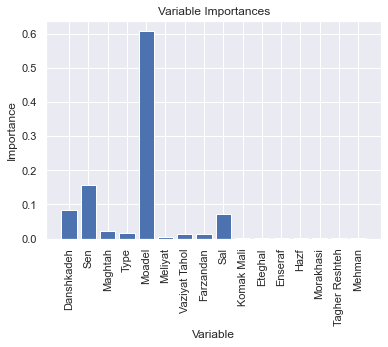

In [32]:
# Set the style
#plt.style.use('fivethirtyeight')

# Get numerical feature importances

feature_list = feature_list = list(df_test.drop(['Jensiyat'], axis=1).columns)

importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [35]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='accuracy', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_search.py

In [36]:
best_random = rf_random.best_estimator_
pprint(best_random.get_params())

best_random_pred = best_random.predict(X_test).round()
print(classification_report(y_test,best_random_pred))
print(confusion_matrix(y_test,best_random_pred))

fpr_rf_opt, tpr_rf_opt, thresholds_rf_opt = roc_curve(y_test, best_random_pred)

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
              precision    recall  f1-score   support

           0       0.71      0.46      0.55      1117
           1       0.70      0.87      0.78      1625

    accuracy                           0.70      2742
   macro avg       0.70      0.66      0.66      2742
weighted avg       0.70      0.70      0.68      2742

[[ 509  608]
 [ 212 1413]]


Variable: Moadel               Importance: 0.41
Variable: Danshkadeh           Importance: 0.27
Variable: Sen                  Importance: 0.14
Variable: Sal                  Importance: 0.08
Variable: Maghtah              Importance: 0.04
Variable: Type                 Importance: 0.02
Variable: Vaziyat Tahol        Importance: 0.02
Variable: Farzandan            Importance: 0.02
Variable: Meliyat              Importance: 0.0
Variable: Komak Mali           Importance: 0.0
Variable: Eteghal              Importance: 0.0
Variable: Enseraf              Importance: 0.0
Variable: Hazf                 Importance: 0.0
Variable: Morakhasi            Importance: 0.0
Variable: Tagher Reshteh       Importance: 0.0
Variable: Mehman               Importance: 0.0


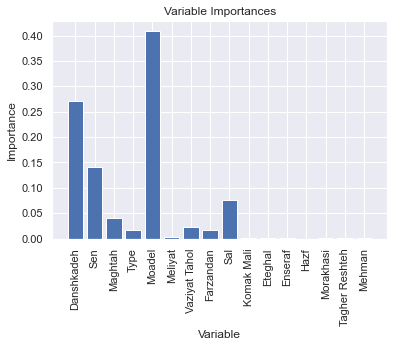

In [37]:
# Get numerical feature importances

importances = list(best_random.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

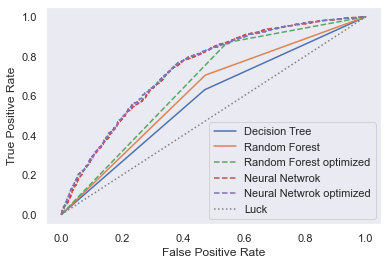

In [42]:
# plot ROC curve
plt.plot(fpr_dt, tpr_dt, label='Decision Tree') # plot random forest ROC
plt.plot(fpr_rf, tpr_rf, label='Random Forest') # plot random forest ROC
plt.plot(fpr_rf_opt, tpr_rf_opt, linestyle='dashed', label='Random Forest optimized') # plot random forest optimized ROC
plt.plot(fpr_NN, tpr_NN, linestyle='dashed', label='Neural Netwrok') # plot neural network ROC
plt.plot(fpr_NN_opt, tpr_NN_opt, linestyle='dashed', label='Neural Netwrok optimized') # plot neural network ROC
plt.plot([0, 1], [0, 1], linestyle='dotted', color='grey', label='Luck') # plot diagonal line to indicate luck
plt.xlabel('False Positive Rate') # x-axis label
plt.ylabel('True Positive Rate') # y-axis label
plt.grid() # add a grid to the plot
plt.legend() # add a legend

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

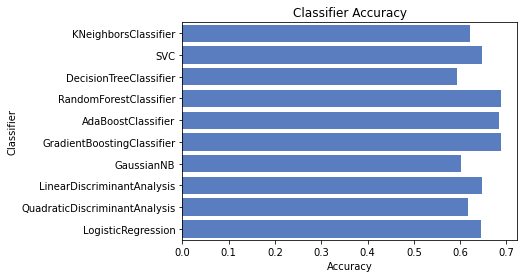

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
 	RandomForestClassifier(criterion='gini', max_depth=8, n_estimators=30, random_state=420),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

acc_dict = {}

dataset_X = df_test.drop(['Jensiyat'], axis=1).values
dataset_y = df_test['Jensiyat'].values

for train_index, test_index in sss.split(scaler.transform(dataset_X), dataset_y):
	X_train, X_test = dataset_X[train_index], dataset_X[test_index]
	y_train, y_test = dataset_y[train_index], dataset_y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)	
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0		# for 10 times accuracy is computed and the final accuracy is the average over 10
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b");